LOAD DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

import xgboost

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = '/content/engine_data.csv'
engine_data = pd.read_csv(file_path)

In [ ]:
engine_data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


ANALYSIS

In [ ]:
print("Dataset Information:")
engine_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [ ]:
print("\nSummary Statistics:")
engine_data.describe()


Summary Statistics:


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [ ]:
print("\nMissing Values:")
print(engine_data.isnull().sum())


Missing Values:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [ ]:
print("\nUnique Values per Column:")
print(engine_data.nunique())


Unique Values per Column:
Engine rpm           1379
Lub oil pressure    19534
Fuel pressure       19531
Coolant pressure    19534
lub oil temp        19530
Coolant temp        19532
Engine Condition        2
dtype: int64


In [ ]:
print("\nCorrelation Matrix:")
correlation_matrix = engine_data.corr()
correlation_matrix


Correlation Matrix:


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
Engine rpm,1.000000,0.025046,-0.001571,-0.024979,0.052134,0.029560,-0.268201
Lub oil pressure,0.025046,1.000000,0.043790,-0.009357,-0.008031,-0.060906,0.060904
Fuel pressure,-0.001571,0.043790,1.000000,0.033264,-0.025338,-0.042986,0.116259
Coolant pressure,-0.024979,-0.009357,0.033264,1.000000,-0.020761,0.033451,-0.024054
lub oil temp,0.052134,-0.008031,-0.025338,-0.020761,1.000000,0.072914,-0.093635
Coolant temp,0.029560,-0.060906,-0.042986,0.033451,0.072914,1.000000,-0.046326
Engine Condition,-0.268201,0.060904,0.116259,-0.024054,-0.093635,-0.046326,1.000000


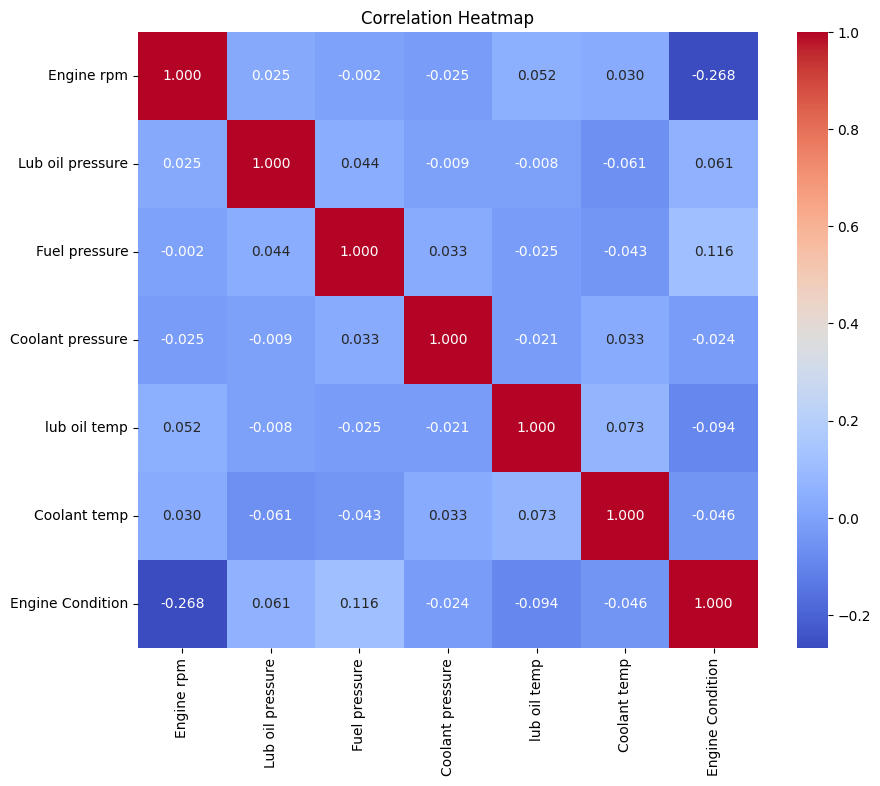

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

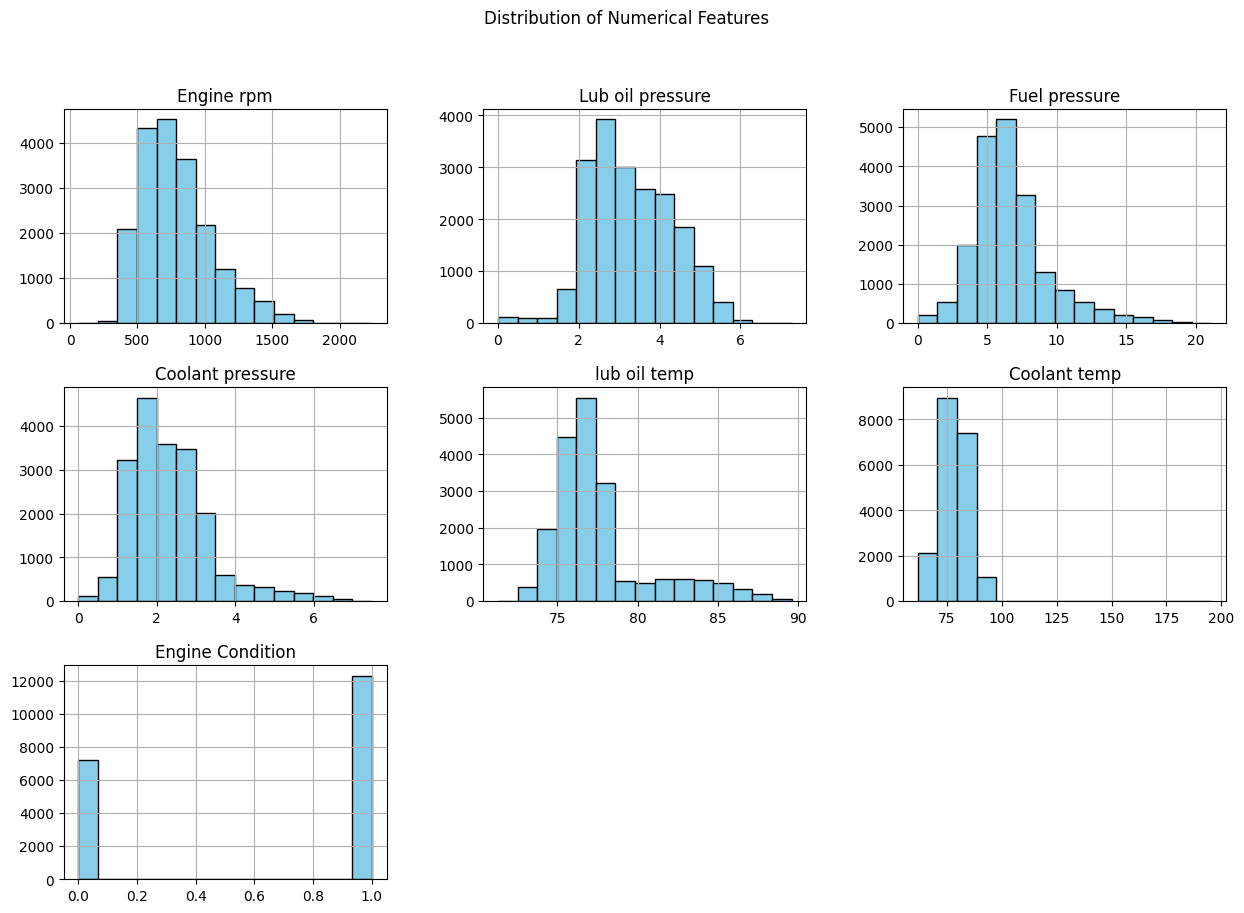

In [ ]:
numerical_columns = engine_data.select_dtypes(include=['float64', 'int64']).columns
engine_data[numerical_columns].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

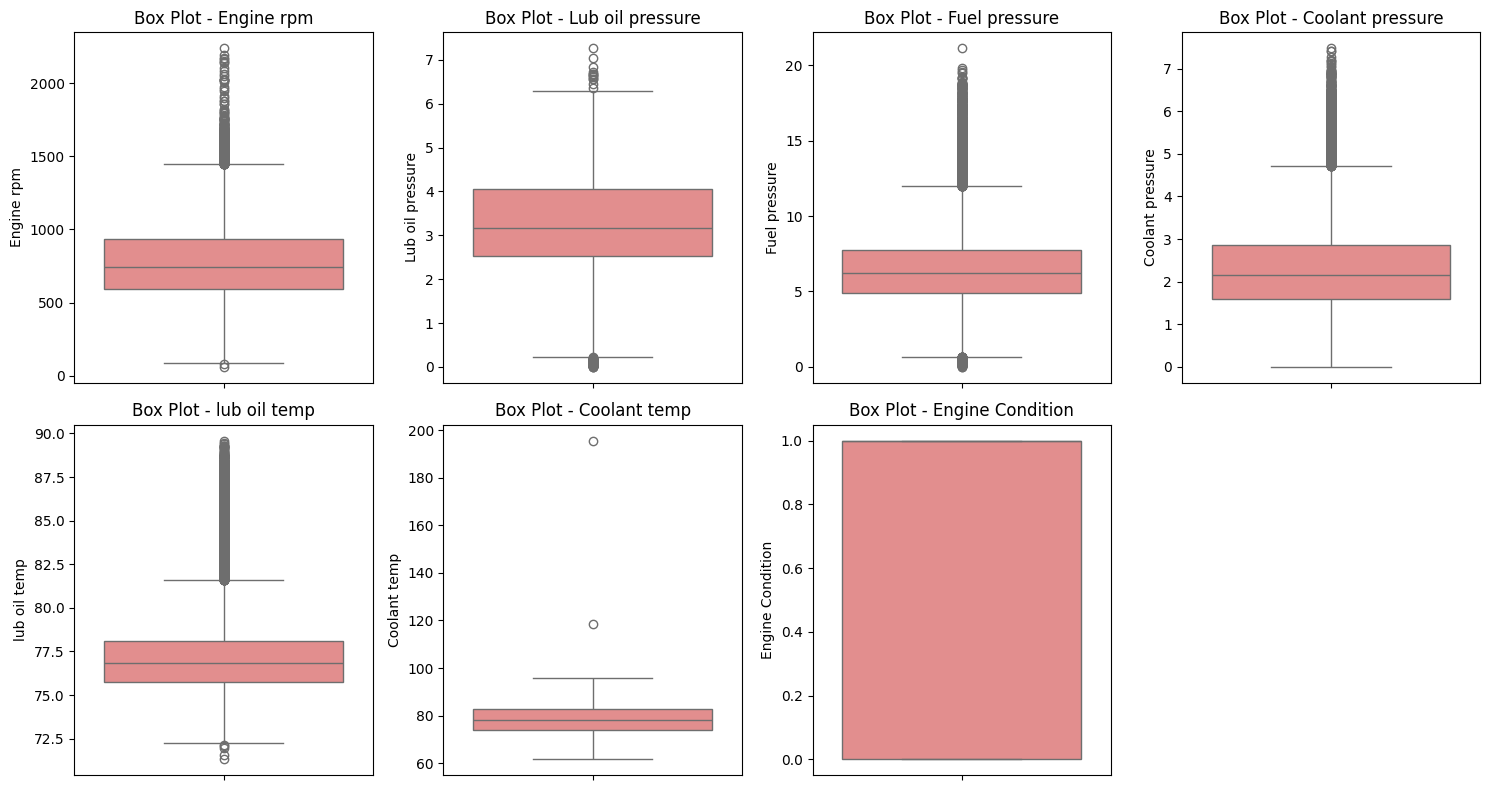

In [ ]:
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2 + 1, i)
    sns.boxplot(data=engine_data[column], color='lightcoral')
    plt.title(f"Box Plot - {column}")
plt.tight_layout()
plt.show()

TARGET DISTRIBUTION

In [ ]:
class_counts = engine_data['Engine Condition'].value_counts()
class_proportions = class_counts / len(engine_data) * 100
print("Class Distribution:")
print(class_counts)
print("\nClass Proportions (%):")
print(class_proportions)

Class Distribution:
Engine Condition
1    12317
0     7218
Name: count, dtype: int64

Class Proportions (%):
Engine Condition
1    63.050934
0    36.949066
Name: count, dtype: float64


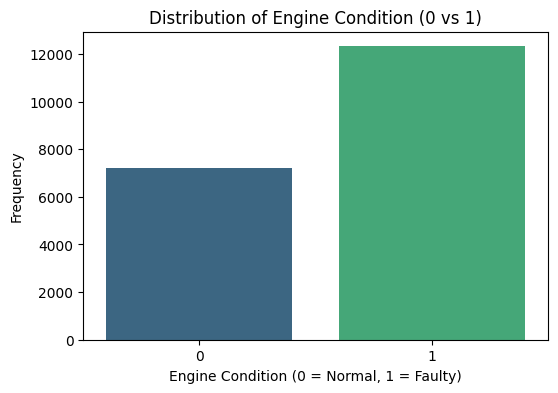

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=engine_data, x='Engine Condition', palette="viridis")
plt.title(f"Distribution of Engine Condition (0 vs 1)")
plt.xlabel("Engine Condition (0 = Normal, 1 = Faulty)")
plt.ylabel("Frequency")
plt.show()


DATASET SPLITTING

In [ ]:
X = engine_data.drop('Engine Condition', axis=1)
y = engine_data['Engine Condition']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (13674, 6) (13674,)
Validation set shape: (2930, 6) (2930,)
Test set shape: (2931, 6) (2931,)


MODEL TRAINING

XGBOOST

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6394
ROC-AUC: 0.5881

Confusion Matrix:
[[ 419  689]
 [ 368 1455]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.38      0.44      1108
           1       0.68      0.80      0.73      1823

    accuracy                           0.64      2931
   macro avg       0.61      0.59      0.59      2931
weighted avg       0.62      0.64      0.62      2931



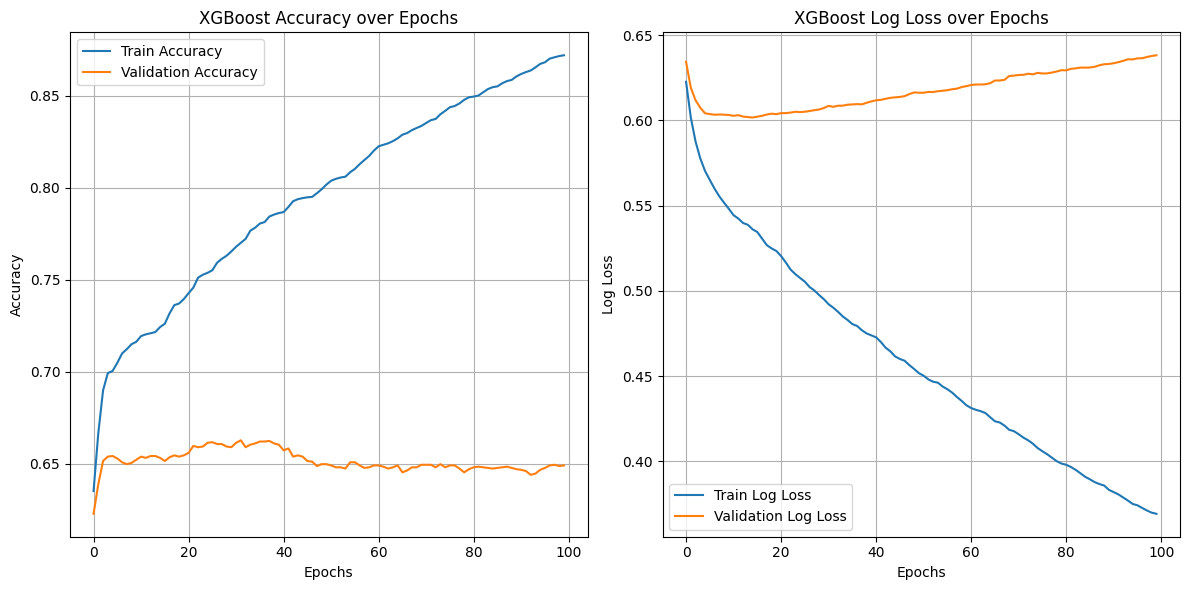

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Train the XGBoost model with a validation set and accuracy as the metric
xgb_model = xgboost.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],  # Track both log loss and accuracy error
    verbosity=0
)

# Fit the model and track the training process
eval_set = [(X_train, y_train), (X_val, y_val)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("XGBoost Model - Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Get the evaluation results for plotting
results = xgb_model.evals_result()

epochs = len(results['validation_0']['logloss'])
x_axis = range(epochs)

# Plot accuracy (1 - error)
train_accuracy = [1 - err for err in results['validation_0']['error']]
val_accuracy = [1 - err for err in results['validation_1']['error']]

# Plot log loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, val_accuracy, label='Validation Accuracy')
plt.title('XGBoost Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot log loss
plt.subplot(1, 2, 2)
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss')
plt.plot(x_axis, results['validation_1']['logloss'], label='Validation Log Loss')
plt.title('XGBoost Log Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


HYPER PARAMETER TUNING

In [ ]:
# Define the XGBoost model
xgb_model = xgboost.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=0)

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'alpha': [0, 0.1, 0.5],
    'lambda': [1, 0.5, 0]
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit the model to the data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the XGBoost model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_xgb_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the best parameters and evaluation metrics
print("Best Hyperparameters from GridSearchCV:", best_params)
print("Best ROC-AUC score from GridSearchCV:", best_score)
print("\nXGBoost Model - Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Best Hyperparameters from GridSearchCV: {'alpha': 0.5, 'colsample_bytree': 0.7, 'lambda': 1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best ROC-AUC score from GridSearchCV: 0.7050381483568334

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6609
ROC-AUC: 0.6006

Confusion Matrix:
[[ 392  716]
 [ 278 1545]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.35      0.44      1108
           1       0.68      0.85      0.76      1823

    accuracy                           0.66      2931
   macro avg       0.63      0.60      0.60      2931
weighted avg       0.65      0.66      0.64      2931



XGBOOST WITH BEST PARAMETERS

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6609
ROC-AUC: 0.6006

Confusion Matrix:
[[ 392  716]
 [ 278 1545]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.35      0.44      1108
           1       0.68      0.85      0.76      1823

    accuracy                           0.66      2931
   macro avg       0.63      0.60      0.60      2931
weighted avg       0.65      0.66      0.64      2931



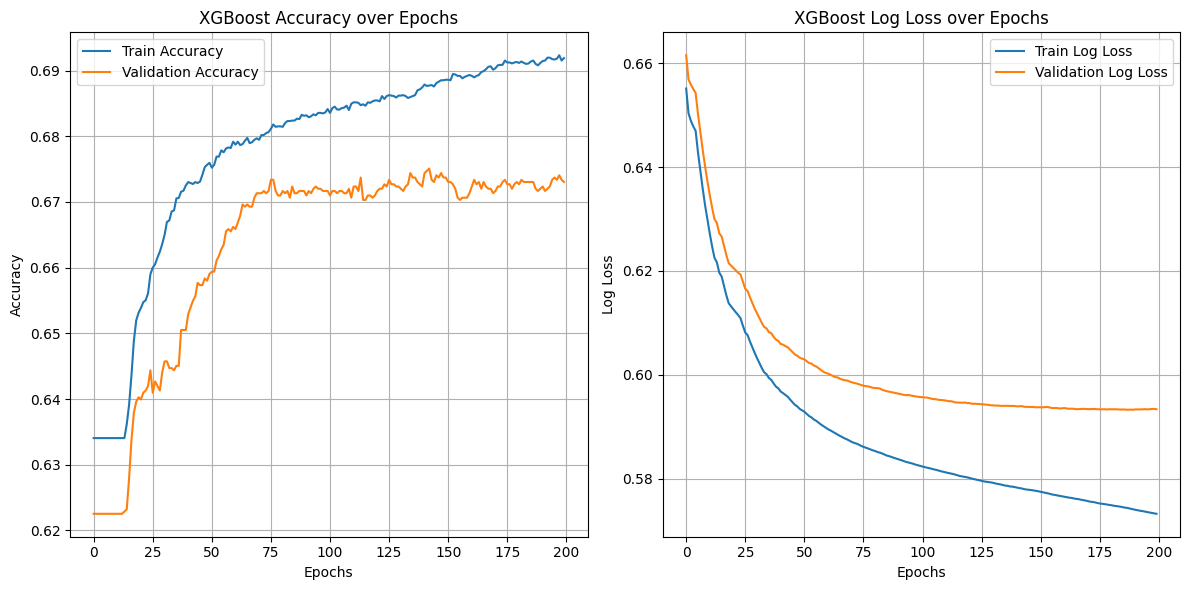

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Best parameters for the XGBoost model
best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 200,
    'subsample': 0.9,
    'lambda': 1.0,  # L2 regularization
    'alpha': 0.5,   # L1 regularization
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': ['logloss', 'error'],  # Track both log loss and accuracy error
    'verbosity': 0
}

# Instantiate the XGBoost classifier
xgb_model = xgboost.XGBClassifier(**best_params)

# Fit the model and track the training process
eval_set = [(X_train, y_train), (X_val, y_val)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("XGBoost Model - Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Get the evaluation results for plotting
results = xgb_model.evals_result()

epochs = len(results['validation_0']['logloss'])
x_axis = range(epochs)

# Plot accuracy (1 - error)
train_accuracy = [1 - err for err in results['validation_0']['error']]
val_accuracy = [1 - err for err in results['validation_1']['error']]

# Plot log loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, val_accuracy, label='Validation Accuracy')
plt.title('XGBoost Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot log loss
plt.subplot(1, 2, 2)
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss')
plt.plot(x_axis, results['validation_1']['logloss'], label='Validation Log Loss')
plt.title('XGBoost Log Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test):

    # Best hyperparameters
    best_params = {
        'colsample_bytree': 0.7,
        'learning_rate': 0.05,
        'max_depth': 3,
        'min_child_weight': 1,
        'n_estimators': 200,
        'subsample': 0.9,
        'lambda': 1.0,  # L2 regularization
        'alpha': 0.5,   # L1 regularization
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': ['logloss', 'error'],  # Track both log loss and accuracy error
        'verbosity': 0
    }

    # Define XGBoost model with the best hyperparameters
    xgb_model = xgboost.XGBClassifier(**best_params)

    # Define eval_set to track performance on validation data
    eval_set = [(X_train, y_train), (X_val, y_val)]

    # Train the model and track the performance on train and validation sets
    xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print evaluation metrics
    print("XGBoost Model - Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    # Get the evaluation results for plotting
    results = xgb_model.evals_result()

    epochs = len(results['validation_0']['logloss'])
    x_axis = range(epochs)

    # Plot accuracy (1 - error)
    train_accuracy = [1 - err for err in results['validation_0']['error']]
    val_accuracy = [1 - err for err in results['validation_1']['error']]

    # Plot log loss
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(x_axis, train_accuracy, label='Train Accuracy')
    plt.plot(x_axis, val_accuracy, label='Validation Accuracy')
    plt.title('XGBoost Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot log loss
    plt.subplot(1, 2, 2)
    plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss')
    plt.plot(x_axis, results['validation_1']['logloss'], label='Validation Log Loss')
    plt.title('XGBoost Log Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


Techniques to Balance Dataset and Reduce Noise

NearMiss-3 (Undersampling)

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6034
ROC-AUC: 0.6034

Confusion Matrix:
[[665 435]
 [424 642]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      1100
           1       0.60      0.60      0.60      1066

    accuracy                           0.60      2166
   macro avg       0.60      0.60      0.60      2166
weighted avg       0.60      0.60      0.60      2166



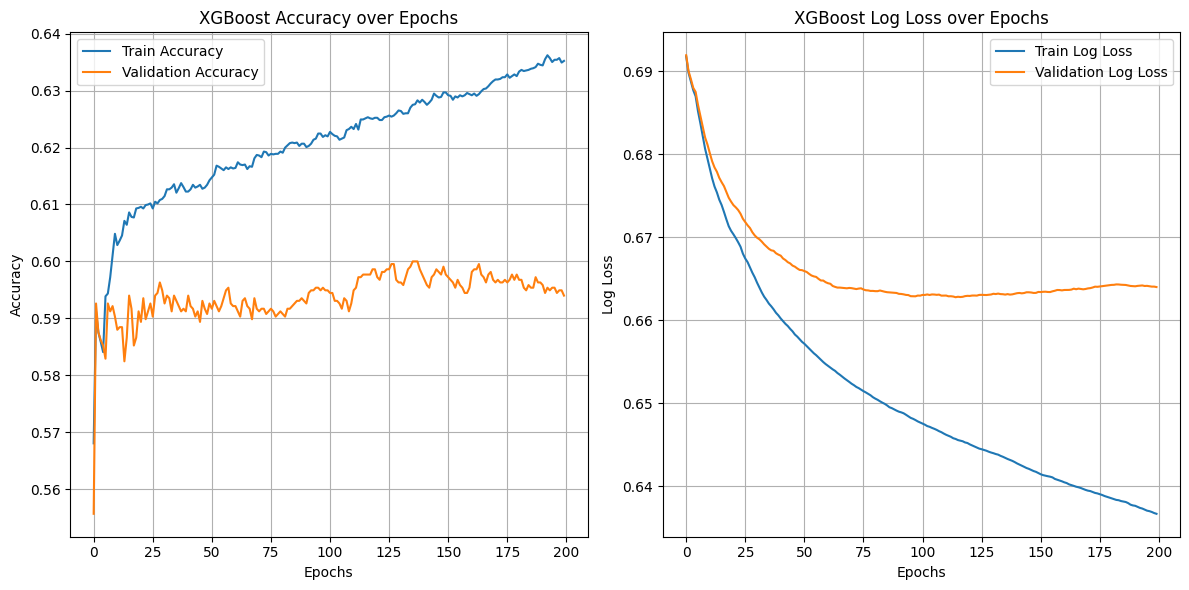

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

# Step 1: Apply NearMiss to balance the entire dataset (both features and labels)
nearmiss_3 = NearMiss(version=3)
X_res_nearmiss, y_res_nearmiss = nearmiss_3.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_nearmiss, y_res_nearmiss, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


ADASYN (Oversampling)

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6269
ROC-AUC: 0.6276

Confusion Matrix:
[[1137  606]
 [ 730 1108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1743
           1       0.65      0.60      0.62      1838

    accuracy                           0.63      3581
   macro avg       0.63      0.63      0.63      3581
weighted avg       0.63      0.63      0.63      3581



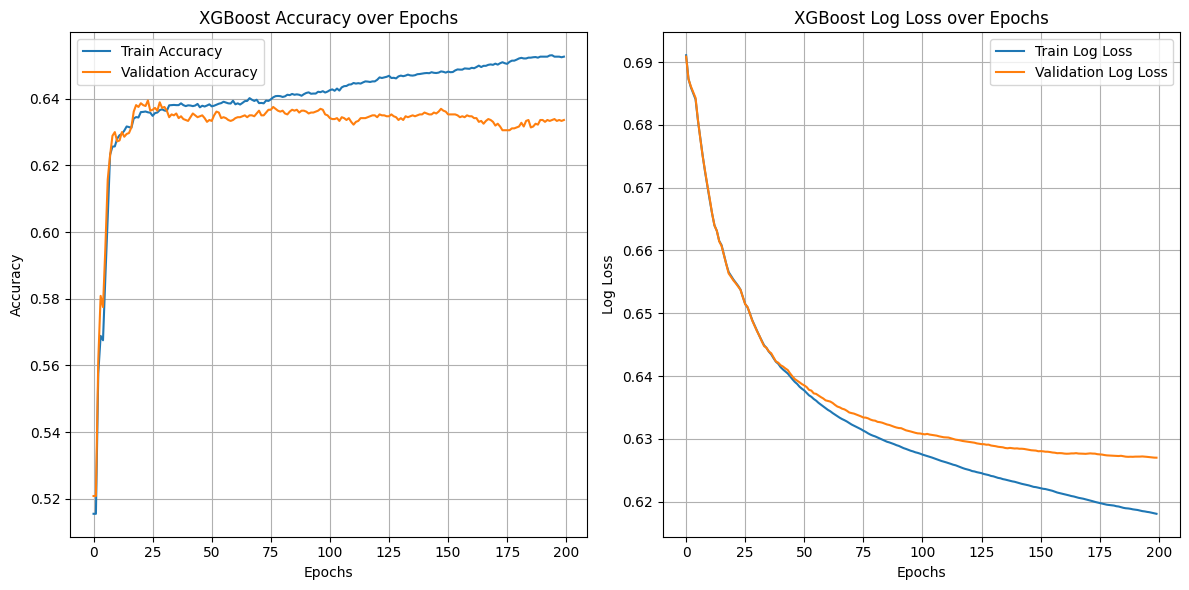

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

# Step 1: Apply ADASYN to balance the entire dataset (both features and labels)
adasyn = ADASYN(random_state=42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_adasyn, y_res_adasyn, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


Undersampling using RandomUnderSampler

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6491
ROC-AUC: 0.6484

Confusion Matrix:
[[762 338]
 [422 644]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      1100
           1       0.66      0.60      0.63      1066

    accuracy                           0.65      2166
   macro avg       0.65      0.65      0.65      2166
weighted avg       0.65      0.65      0.65      2166



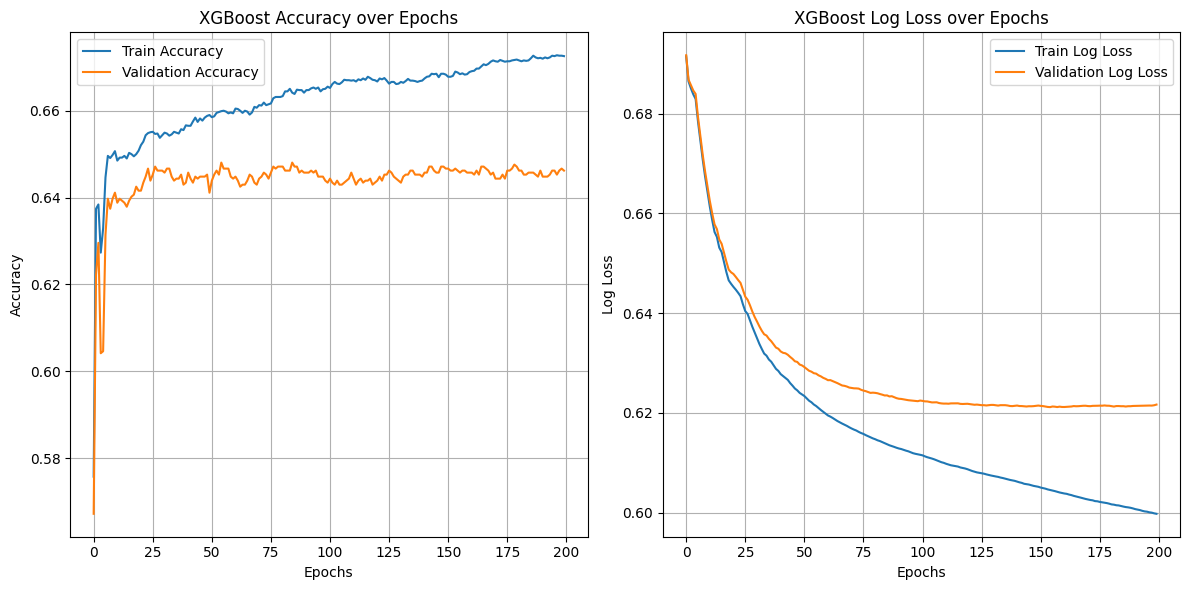

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Step 1: Apply RandomUnderSampler to balance the entire dataset (both features and labels)
undersample = RandomUnderSampler(random_state=42)
X_res_undersample, y_res_undersample = undersample.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_undersample, y_res_undersample, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


ClusterCentroids (Undersampling)

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6584
ROC-AUC: 0.6576

Confusion Matrix:
[[774 326]
 [414 652]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.68      1100
           1       0.67      0.61      0.64      1066

    accuracy                           0.66      2166
   macro avg       0.66      0.66      0.66      2166
weighted avg       0.66      0.66      0.66      2166



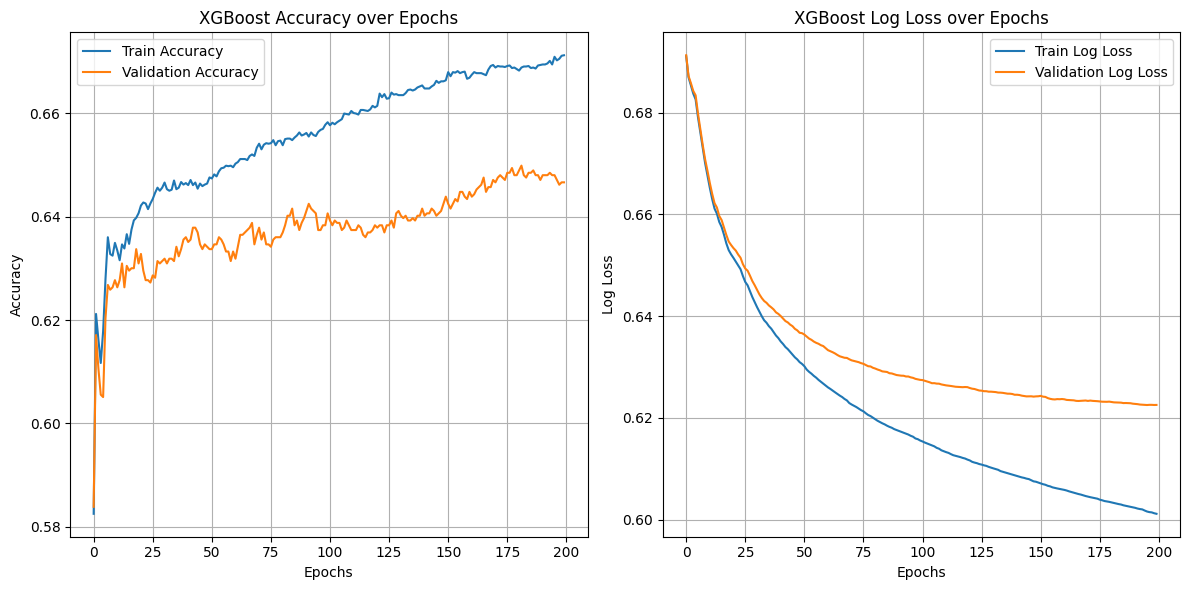

In [ ]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split

# Step 1: Apply ClusterCentroids to balance the entire dataset (both features and labels)
cluster_centroids = ClusterCentroids(random_state=42)
X_res_cluster_centroids, y_res_cluster_centroids = cluster_centroids.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_cluster_centroids, y_res_cluster_centroids, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


RandomOverSampler

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6561
ROC-AUC: 0.6557

Confusion Matrix:
[[1316  546]
 [ 725 1109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1862
           1       0.67      0.60      0.64      1834

    accuracy                           0.66      3696
   macro avg       0.66      0.66      0.66      3696
weighted avg       0.66      0.66      0.66      3696



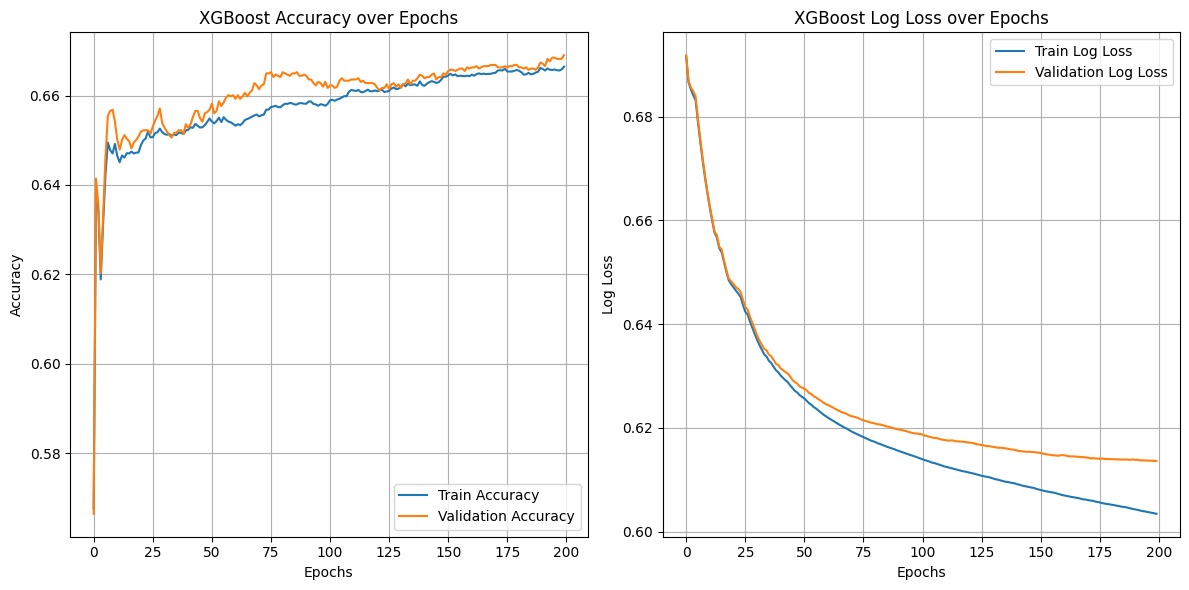

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Step 1: Apply RandomOverSampler to balance the entire dataset (both features and labels)
oversample = RandomOverSampler(random_state=42)
X_res_oversample, y_res_oversample = oversample.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_oversample, y_res_oversample, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


SMOTETomek (Combination of SMOTE and Tomek Links)

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6708
ROC-AUC: 0.6708

Confusion Matrix:
[[1221  484]
 [ 640 1069]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.68      1705
           1       0.69      0.63      0.66      1709

    accuracy                           0.67      3414
   macro avg       0.67      0.67      0.67      3414
weighted avg       0.67      0.67      0.67      3414



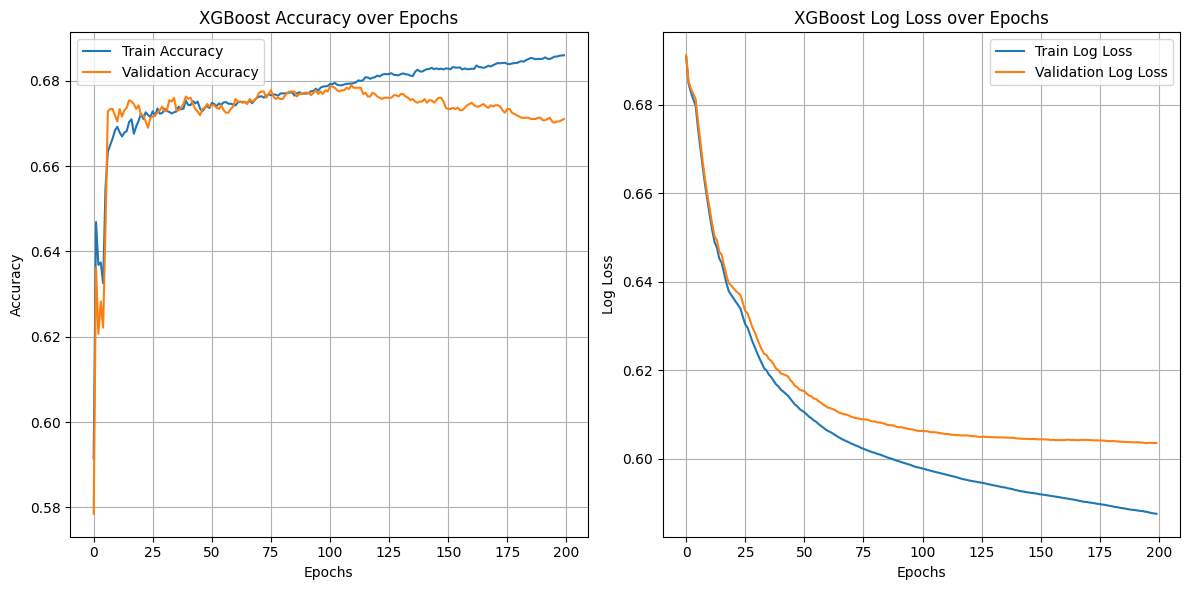

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Step 1: Apply SMOTETomek to balance the entire dataset (both features and labels)
smote_tomek = SMOTETomek(random_state=42)
X_res_smote_tomek, y_res_smote_tomek = smote_tomek.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_smote_tomek, y_res_smote_tomek, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


Oversampling using SMOTE

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6591
ROC-AUC: 0.6588

Confusion Matrix:
[[1310  552]
 [ 708 1126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.68      1862
           1       0.67      0.61      0.64      1834

    accuracy                           0.66      3696
   macro avg       0.66      0.66      0.66      3696
weighted avg       0.66      0.66      0.66      3696



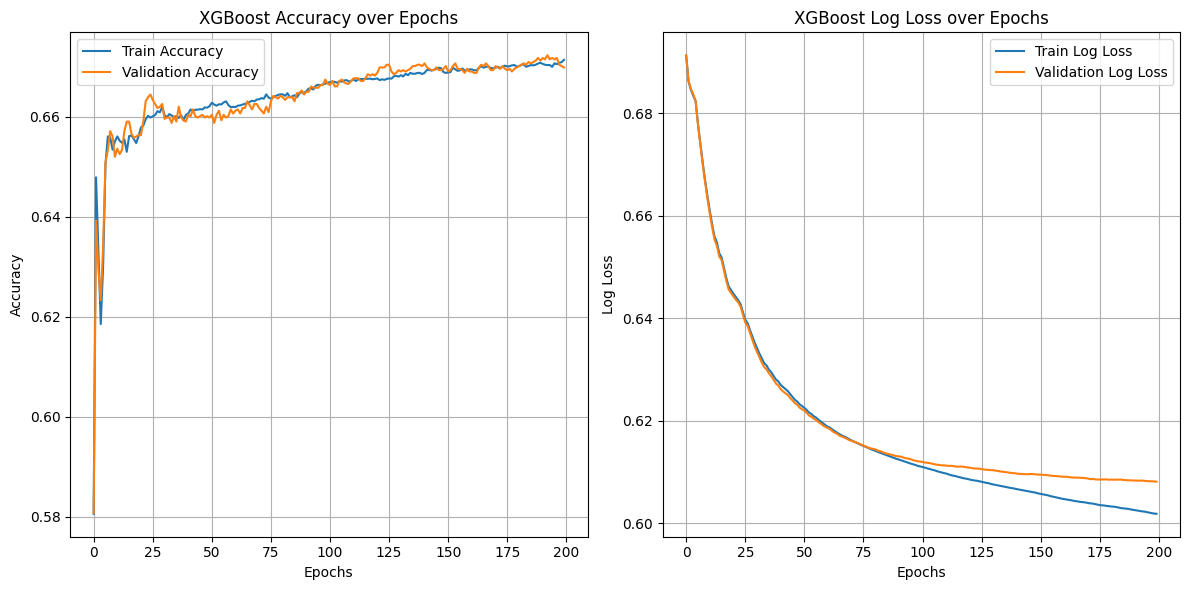

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Apply SMOTE to balance the entire dataset (both features and labels)
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_smote, y_res_smote, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


Tomek Links (Undersampling)

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6811
ROC-AUC: 0.6577

Confusion Matrix:
[[ 569  531]
 [ 311 1229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.57      1100
           1       0.70      0.80      0.74      1540

    accuracy                           0.68      2640
   macro avg       0.67      0.66      0.66      2640
weighted avg       0.68      0.68      0.67      2640



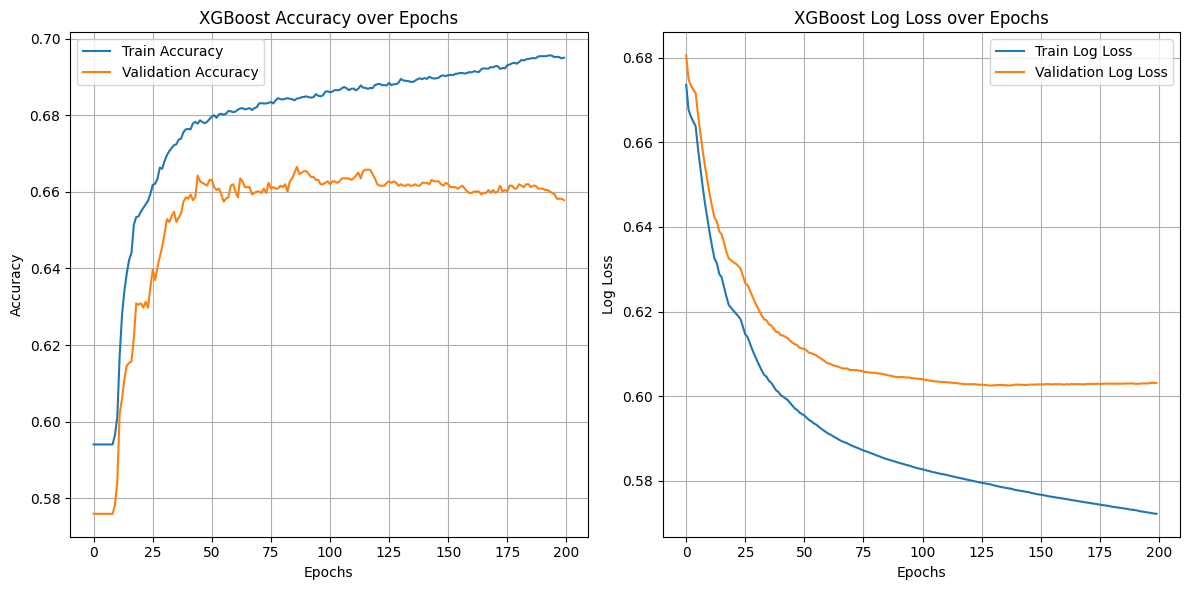

In [ ]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

# Step 1: Apply TomekLinks to balance the entire dataset
tomek = TomekLinks()
X_res_tomek, y_res_tomek = tomek.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_tomek, y_res_tomek, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


NearMiss (Undersampling)

XGBoost Model - Evaluation Metrics:
Accuracy: 0.6773
ROC-AUC: 0.6782

Confusion Matrix:
[[685 415]
 [284 782]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1100
           1       0.65      0.73      0.69      1066

    accuracy                           0.68      2166
   macro avg       0.68      0.68      0.68      2166
weighted avg       0.68      0.68      0.68      2166



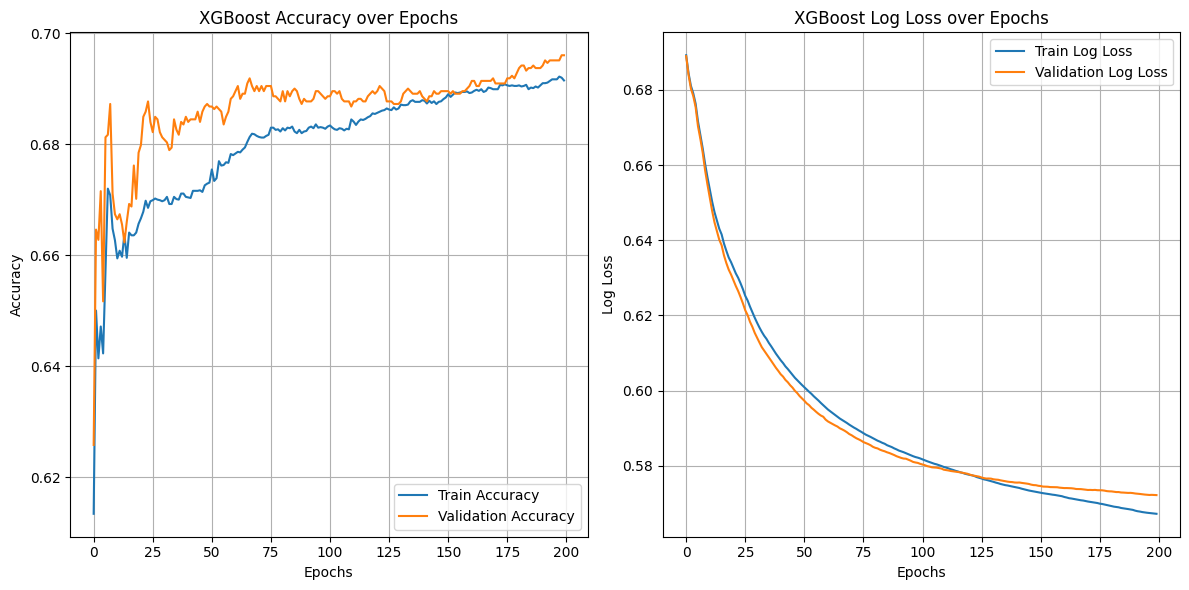

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

# Step 1: Apply NearMiss to balance the entire dataset
nearmiss = NearMiss()
X_res_nearmiss, y_res_nearmiss = nearmiss.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_nearmiss, y_res_nearmiss, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


Edited Nearest Neighbors (ENN)

XGBoost Model - Evaluation Metrics:
Accuracy: 0.7932
ROC-AUC: 0.7679

Confusion Matrix:
[[941 143]
 [215 432]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1084
           1       0.75      0.67      0.71       647

    accuracy                           0.79      1731
   macro avg       0.78      0.77      0.77      1731
weighted avg       0.79      0.79      0.79      1731



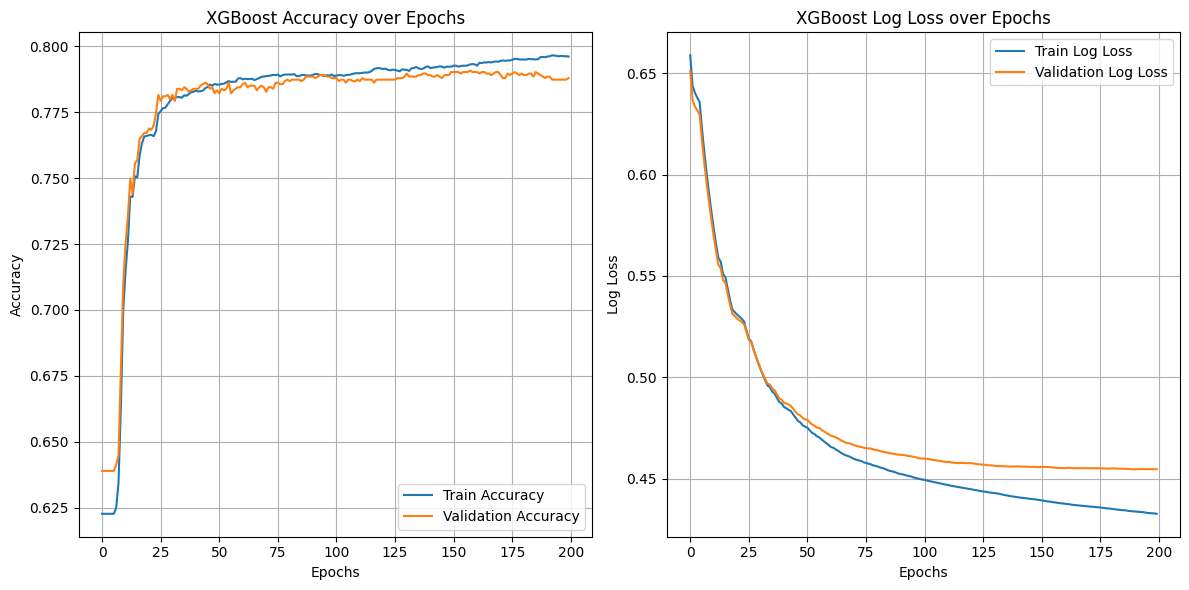

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split

# Step 1: Apply EditedNearestNeighbours (ENN) to the entire dataset
enn = EditedNearestNeighbours()
X_res_enn, y_res_enn = enn.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res_enn, y_res_enn, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training data and validation/test data
evaluate_xgboost_model(X_train, y_train, X_val, y_val, X_test, y_test)


SMOTEENN

XGBoost Model - Evaluation Metrics:
Accuracy: 0.8188
ROC-AUC: 0.8044

Confusion Matrix:
[[750 100]
 [160 425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       850
           1       0.81      0.73      0.77       585

    accuracy                           0.82      1435
   macro avg       0.82      0.80      0.81      1435
weighted avg       0.82      0.82      0.82      1435



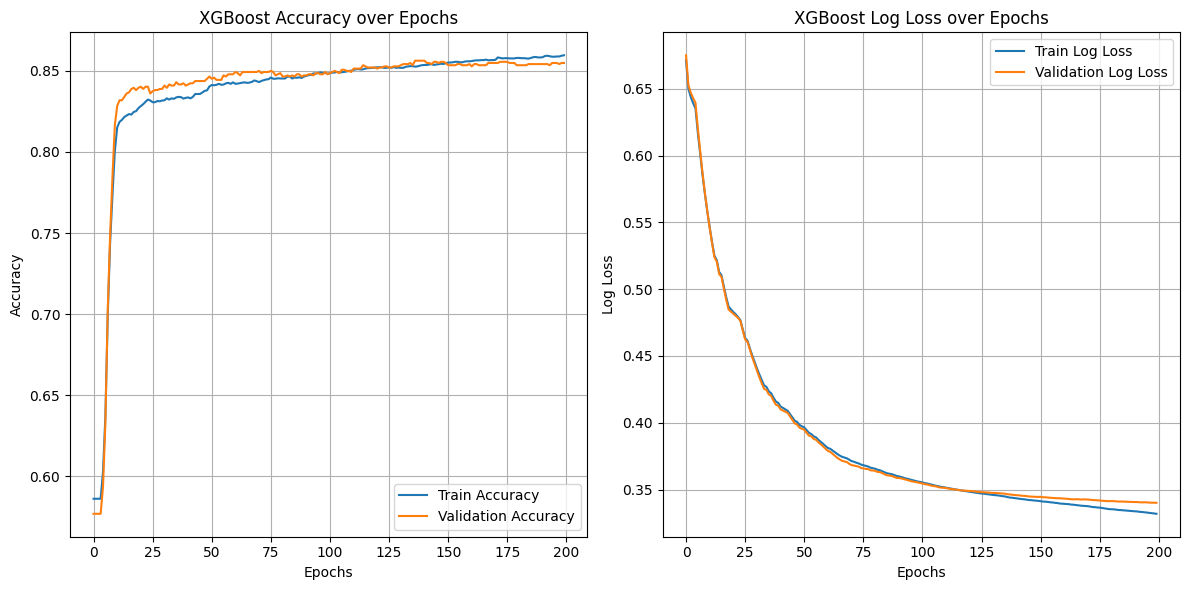

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Step 1: Apply SMOTEENN to balance the entire dataset
smote_enn = SMOTEENN(random_state=42)
X_res_smoteenn, y_res_smoteenn = smote_enn.fit_resample(X, y)

# Step 2: Split the resampled data into train, validation, and test sets
X_train_res_smoteenn, X_temp, y_train_res_smoteenn, y_temp = train_test_split(X_res_smoteenn, y_res_smoteenn, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val_res_smoteenn, X_test_res_smoteenn, y_val_res_smoteenn, y_test_res_smoteenn = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 3: Evaluate the model using the resampled training, validation, and test data
evaluate_xgboost_model(X_train_res_smoteenn, y_train_res_smoteenn, X_val_res_smoteenn, y_val_res_smoteenn, X_test_res_smoteenn, y_test_res_smoteenn)


XGBoost Classifier - Hyperparameter Tuning

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Best Hyperparameters from GridSearchCV: {'alpha': 0, 'colsample_bytree': 0.7, 'lambda': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best ROC-AUC score from GridSearchCV: 0.9292795147871595

XGBoost Model - Evaluation Metrics:
Accuracy: 0.8509
ROC-AUC: 0.8373

Confusion Matrix:
[[774  76]
 [138 447]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       850
           1       0.85      0.76      0.81       585

    accuracy                           0.85      1435
   macro avg       0.85      0.84      0.84      1435
weighted avg       0.85      0.85      0.85      1435



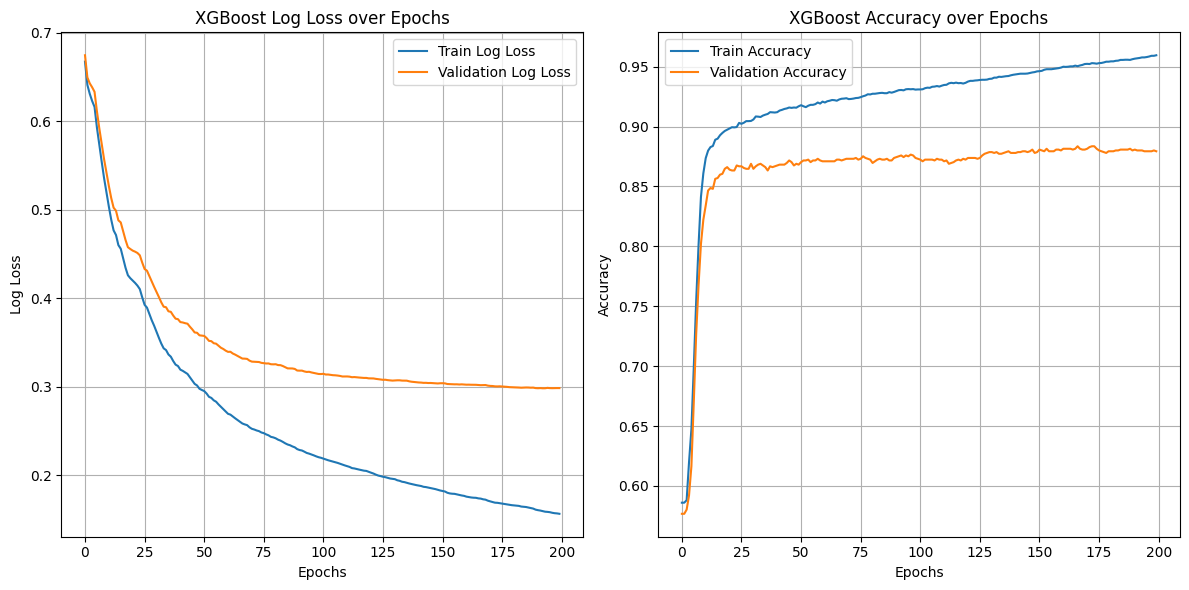

In [ ]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model with both 'logloss' and 'error' metrics
xgb_model = xgboost.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],  # Track log loss and classification error
    verbosity=0
)

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'alpha': [0, 0.1, 0.5],
    'lambda': [1, 0.5, 0]
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit the model to the resampled training data using GridSearchCV
grid_search.fit(X_train_res_smoteenn, y_train_res_smoteenn)

# Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the XGBoost model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Fit with the evaluation set to track training progress
eval_set = [(X_train_res_smoteenn, y_train_res_smoteenn), (X_val_res_smoteenn, y_val_res_smoteenn)]
best_xgb_model.fit(X_train_res_smoteenn, y_train_res_smoteenn, eval_set=eval_set, verbose=False)

# Predict on the test data
y_pred = best_xgb_model.predict(X_test_res_smoteenn)

# Calculate classification metrics
accuracy = accuracy_score(y_test_res_smoteenn, y_pred)
roc_auc = roc_auc_score(y_test_res_smoteenn, y_pred)
conf_matrix = confusion_matrix(y_test_res_smoteenn, y_pred)
class_report = classification_report(y_test_res_smoteenn, y_pred)

# Output the best parameters and evaluation metrics
print("Best Hyperparameters from GridSearchCV:", best_params)
print("Best ROC-AUC score from GridSearchCV:", best_score)
print("\nXGBoost Model - Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Get the evaluation results for plotting
results = best_xgb_model.evals_result()

epochs = len(results['validation_0']['logloss'])
x_axis = range(epochs)

# Plot accuracy (1 - error)
train_accuracy = [1 - err for err in results['validation_0']['error']]
val_accuracy = [1 - err for err in results['validation_1']['error']]

# Plot log loss
plt.figure(figsize=(12, 6))

# Plot log loss
plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss')
plt.plot(x_axis, results['validation_1']['logloss'], label='Validation Log Loss')
plt.title('XGBoost Log Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)

# Plot training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(x_axis, train_accuracy, label='Train Accuracy')
plt.plot(x_axis, val_accuracy, label='Validation Accuracy')
plt.title('XGBoost Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Gradient Boosting Classifier - Hyperparameter Tuning

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Gradient Boosting Classifier - Evaluation Metrics on Test Set:
Accuracy: 0.8599
ROC-AUC: 0.9238

Confusion Matrix:
[[777  73]
 [128 457]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       850
           1       0.86      0.78      0.82       585

    accuracy                           0.86      1435
   macro avg       0.86      0.85      0.85      1435
weighted avg       0.86      0.86      0.86      1435



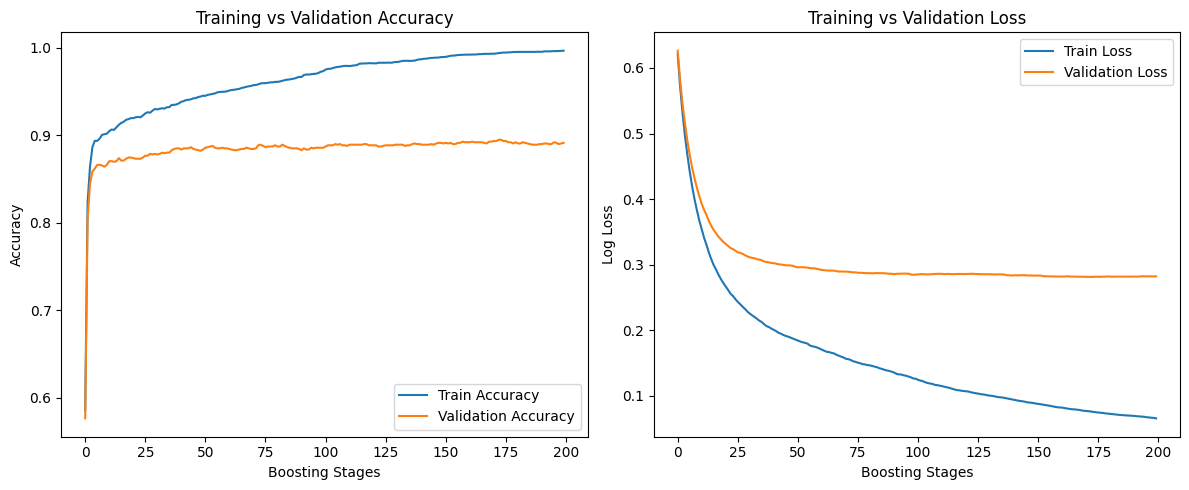

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, log_loss

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

# Apply GridSearchCV for hyperparameter tuning using resampled data
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res_smoteenn, y_train_res_smoteenn)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# Track training and validation performance at each stage
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

# Evaluate model on training and validation set at each boosting stage
for y_train_pred, y_val_pred, y_train_proba, y_val_proba in zip(
        best_model.staged_predict(X_train_res_smoteenn),
        best_model.staged_predict(X_val_res_smoteenn),
        best_model.staged_predict_proba(X_train_res_smoteenn),
        best_model.staged_predict_proba(X_val_res_smoteenn)
):
    # Accuracy
    train_acc = accuracy_score(y_train_res_smoteenn, y_train_pred)
    val_acc = accuracy_score(y_val_res_smoteenn, y_val_pred)
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)

    # Log Loss
    train_loss.append(log_loss(y_train_res_smoteenn, y_train_proba))
    val_loss.append(log_loss(y_val_res_smoteenn, y_val_proba))

# Make predictions on the test set
y_pred = best_model.predict(X_test_res_smoteenn)
y_pred_proba = best_model.predict_proba(X_test_res_smoteenn)[:, 1]  # For ROC-AUC

# Calculate performance metrics
accuracy = accuracy_score(y_test_res_smoteenn, y_pred)
roc_auc = roc_auc_score(y_test_res_smoteenn, y_pred_proba)
conf_matrix = confusion_matrix(y_test_res_smoteenn, y_pred)
class_report = classification_report(y_test_res_smoteenn, y_pred)

# Print evaluation metrics
print("\nGradient Boosting Classifier - Evaluation Metrics on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Boosting Stages')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Boosting Stages')
plt.ylabel('Log Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Random Forest Classifier - Hyperparameter Tuning

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Classifier - Evaluation Metrics on Test Set:
Accuracy: 0.8237
ROC-AUC: 0.8968

Confusion Matrix:
[[754  96]
 [157 428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       850
           1       0.82      0.73      0.77       585

    accuracy                           0.82      1435
   macro avg       0.82      0.81      0.81      1435
weighted avg       0.82      0.82      0.82      1435



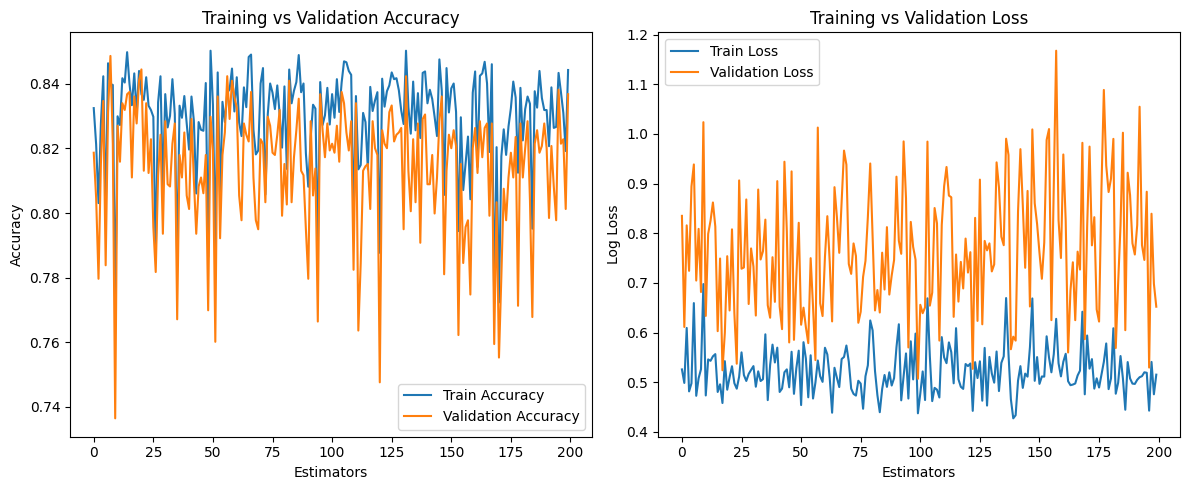

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, log_loss


# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Apply GridSearchCV for hyperparameter tuning using the resampled training data
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res_smoteenn, y_train_res_smoteenn)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# Track training and validation performance at each stage
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

# Fit the model with the best parameters using the entire training set
best_model.fit(X_train_res_smoteenn, y_train_res_smoteenn)

# Track performance at different stages
for estimator in best_model.estimators_:
    # Evaluate on training set
    y_train_pred = estimator.predict(X_train_res_smoteenn)
    y_train_proba = estimator.predict_proba(X_train_res_smoteenn)
    train_accuracy.append(accuracy_score(y_train_res_smoteenn, y_train_pred))
    train_loss.append(log_loss(y_train_res_smoteenn, y_train_proba))

    # Evaluate on validation set
    y_val_pred = estimator.predict(X_val_res_smoteenn)
    y_val_proba = estimator.predict_proba(X_val_res_smoteenn)
    val_accuracy.append(accuracy_score(y_val_res_smoteenn, y_val_pred))
    val_loss.append(log_loss(y_val_res_smoteenn, y_val_proba))

# Make predictions on the test set
y_pred = best_model.predict(X_test_res_smoteenn)
y_pred_proba = best_model.predict_proba(X_test_res_smoteenn)[:, 1]  # For ROC-AUC

# Calculate performance metrics
accuracy = accuracy_score(y_test_res_smoteenn, y_pred)
roc_auc = roc_auc_score(y_test_res_smoteenn, y_pred_proba)
conf_matrix = confusion_matrix(y_test_res_smoteenn, y_pred)
class_report = classification_report(y_test_res_smoteenn, y_pred)

# Print evaluation metrics
print("\nRandom Forest Classifier - Evaluation Metrics on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Estimators')
plt.ylabel('Log Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Logistic Regression - Hyperparameter Tuning

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression - Evaluation Metrics on Test Set:
Accuracy: 0.8049
ROC-AUC: 0.8775

Confusion Matrix:
[[725 125]
 [155 430]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       850
           1       0.77      0.74      0.75       585

    accuracy                           0.80      1435
   macro avg       0.80      0.79      0.80      1435
weighted avg       0.80      0.80      0.80      1435



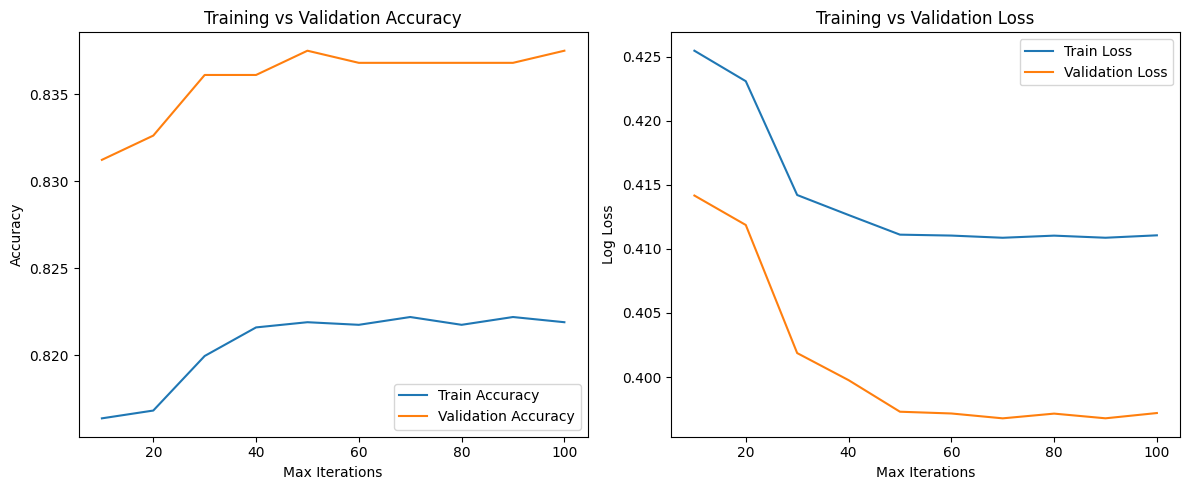

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, log_loss

# Initialize Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
}

# Apply GridSearchCV for hyperparameter tuning using the resampled training data
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res_smoteenn, y_train_res_smoteenn)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Remove 'max_iter' from best_params for looping
max_iter_value = best_params.pop('max_iter')

# Train the model with the best parameters using the entire training set
lr_model_best = LogisticRegression(**best_params, max_iter=max_iter_value)
lr_model_best.fit(X_train_res_smoteenn, y_train_res_smoteenn)

# Initialize lists to track accuracy and loss
train_accuracy = []
val_accuracy = []
train_loss = []
val_loss = []

# Evaluate model performance on the training and validation sets at different max iterations
max_iters = range(10, max_iter_value + 1, 10)  # Step size of 10 for efficiency

for max_iter in max_iters:
    # Update the model with the current max_iter
    lr_model_iter = LogisticRegression(**best_params, max_iter=max_iter)
    lr_model_iter.fit(X_train_res_smoteenn, y_train_res_smoteenn)

    # Training predictions
    y_train_pred = lr_model_iter.predict(X_train_res_smoteenn)
    y_train_proba = lr_model_iter.predict_proba(X_train_res_smoteenn)
    train_accuracy.append(accuracy_score(y_train_res_smoteenn, y_train_pred))
    train_loss.append(log_loss(y_train_res_smoteenn, y_train_proba))

    # Validation predictions
    y_val_pred = lr_model_iter.predict(X_val_res_smoteenn)
    y_val_proba = lr_model_iter.predict_proba(X_val_res_smoteenn)
    val_accuracy.append(accuracy_score(y_val_res_smoteenn, y_val_pred))
    val_loss.append(log_loss(y_val_res_smoteenn, y_val_proba))

# Make predictions on the test set
y_pred = lr_model_best.predict(X_test_res_smoteenn)
y_pred_proba = lr_model_best.predict_proba(X_test_res_smoteenn)[:, 1]  # For ROC-AUC

# Calculate performance metrics on the test set
accuracy = accuracy_score(y_test_res_smoteenn, y_pred)
roc_auc = roc_auc_score(y_test_res_smoteenn, y_pred_proba)
conf_matrix = confusion_matrix(y_test_res_smoteenn, y_pred)
class_report = classification_report(y_test_res_smoteenn, y_pred)

# Print evaluation metrics
print("\nLogistic Regression - Evaluation Metrics on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(max_iters, train_accuracy, label='Train Accuracy')
plt.plot(max_iters, val_accuracy, label='Validation Accuracy')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(max_iters, train_loss, label='Train Loss')
plt.plot(max_iters, val_loss, label='Validation Loss')
plt.xlabel('Max Iterations')
plt.ylabel('Log Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


ENSEMBLE MODELS

Stacked ensemble

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss

X_train_res_smoteenn, X_test_res_smoteenn, y_train_res_smoteenn, y_test_res_smoteenn = train_test_split(X_res_smoteenn, y_res_smoteenn, test_size=0.2, random_state=42)

# Initialize models with the best hyperparameters
xgb_clf = XGBClassifier(
    alpha=0, colsample_bytree=0.7, lambda_=0, learning_rate=0.05,
    max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8,
    random_state=42
)

grad_boost_clf = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=7, n_estimators=200, random_state=42
)

rf_clf = RandomForestClassifier(
    max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=200,
    random_state=42
)

log_reg_clf = LogisticRegression(
    C=1, penalty='l1', solver='liblinear', max_iter=100, random_state=42
)

# Base models
base_models = [
    ('xgboost', xgb_clf),
    ('gradient_boosting', grad_boost_clf),
    ('random_forest', rf_clf),
    ('logistic_regression', log_reg_clf)
]

# Meta-model (CatBoost with tuned parameters)
meta_model = CatBoostClassifier(
    iterations=100, learning_rate=0.05, depth=6, random_state=42, verbose=0
)

# Create a Stacking Classifier
stacked_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    stack_method='predict_proba',
    cv=5,
    n_jobs=-1
)

# Train the stacked model with validation set for early stopping
history = stacked_clf.fit(X_train_res_smoteenn, y_train_res_smoteenn)

# Evaluate the model on the validation set
y_pred_val = stacked_clf.predict(X_val_res_smoteenn)
y_pred_val_prob = stacked_clf.predict_proba(X_val_res_smoteenn)[:, 1]

# Make predictions on the test set
y_pred_test = stacked_clf.predict(X_test_res_smoteenn)
y_pred_test_prob = stacked_clf.predict_proba(X_test_res_smoteenn)[:, 1]

# Evaluation on Test Set
accuracy_test = accuracy_score(y_test_res_smoteenn, y_pred_test)
roc_auc_test = roc_auc_score(y_test_res_smoteenn, y_pred_test_prob)
conf_matrix_test = confusion_matrix(y_test_res_smoteenn, y_pred_test)
class_report_test = classification_report(y_test_res_smoteenn, y_pred_test)

print("\nTest Set - Stacked Ensemble Model - Evaluation Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_test)
print("\nClassification Report:")
print(class_report_test)



Test Set - Stacked Ensemble Model - Evaluation Metrics:
Accuracy: 0.8866
ROC-AUC: 0.9410

Confusion Matrix:
[[1040   87]
 [ 130  656]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1127
           1       0.88      0.83      0.86       786

    accuracy                           0.89      1913
   macro avg       0.89      0.88      0.88      1913
weighted avg       0.89      0.89      0.89      1913



Voting ensemble

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier

# Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('xgboost', xgb_clf),
        ('gradient_boosting', grad_boost_clf),
        ('random_forest', rf_clf),
        ('logistic_regression', log_reg_clf)
    ],
    voting='soft'  # Use 'soft' for averaging probabilities
)

# Train the voting classifier
voting_clf.fit(X_train_res_smoteenn, y_train_res_smoteenn)

# Make predictions using the voting model
y_pred_voting = voting_clf.predict(X_test_res_smoteenn)
y_pred_voting_prob = voting_clf.predict_proba(X_test_res_smoteenn)[:, 1]

# Evaluate the Voting Model
accuracy_voting = accuracy_score(y_test_res_smoteenn, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test_res_smoteenn, y_pred_voting_prob)
conf_matrix_voting = confusion_matrix(y_test_res_smoteenn, y_pred_voting)
class_report_voting = classification_report(y_test_res_smoteenn, y_pred_voting)

print("\nVoting Ensemble Model - Evaluation Metrics:")
print(f"Accuracy: {accuracy_voting:.4f}")
print(f"ROC-AUC: {roc_auc_voting:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_voting)
print("\nClassification Report:")
print(class_report_voting)


Voting Ensemble Model - Evaluation Metrics:
Accuracy: 0.8625
ROC-AUC: 0.9289

Confusion Matrix:
[[1029   98]
 [ 165  621]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1127
           1       0.86      0.79      0.83       786

    accuracy                           0.86      1913
   macro avg       0.86      0.85      0.86      1913
weighted avg       0.86      0.86      0.86      1913



Voting & Stacked ensemble comparsion plot

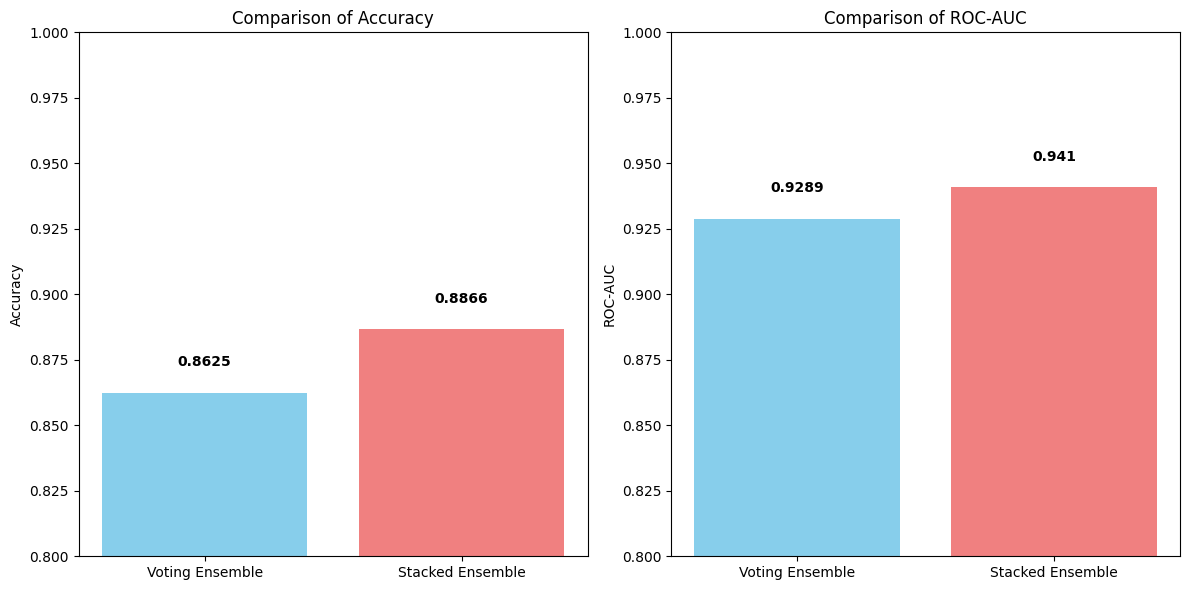

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Voting Ensemble
accuracy_voting = 0.8625
roc_auc_voting = 0.9289

# Metrics for Stacked Ensemble
accuracy_stacked = 0.8866
roc_auc_stacked = 0.9410

# Model names
model_names = ['Voting Ensemble', 'Stacked Ensemble']

# Create a figure and two axes objects (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot Accuracy on ax1
ax1.bar(model_names, [accuracy_voting, accuracy_stacked], color=['skyblue', 'lightcoral'])
ax1.set_title('Comparison of Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.8, 1.0)

# Add accuracy values on top of bars in ax1
for i, v in enumerate([accuracy_voting, accuracy_stacked]):
    ax1.text(i, v + 0.01, str(round(v, 4)), ha='center', fontweight='bold')

# Plot ROC-AUC on ax2
ax2.bar(model_names, [roc_auc_voting, roc_auc_stacked], color=['skyblue', 'lightcoral'])
ax2.set_title('Comparison of ROC-AUC')
ax2.set_ylabel('ROC-AUC')
ax2.set_ylim(0.8, 1.0)

# Add ROC-AUC values on top of bars in ax2
for i, v in enumerate([roc_auc_voting, roc_auc_stacked]):
    ax2.text(i, v + 0.01, str(round(v, 4)), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Model comparison graph

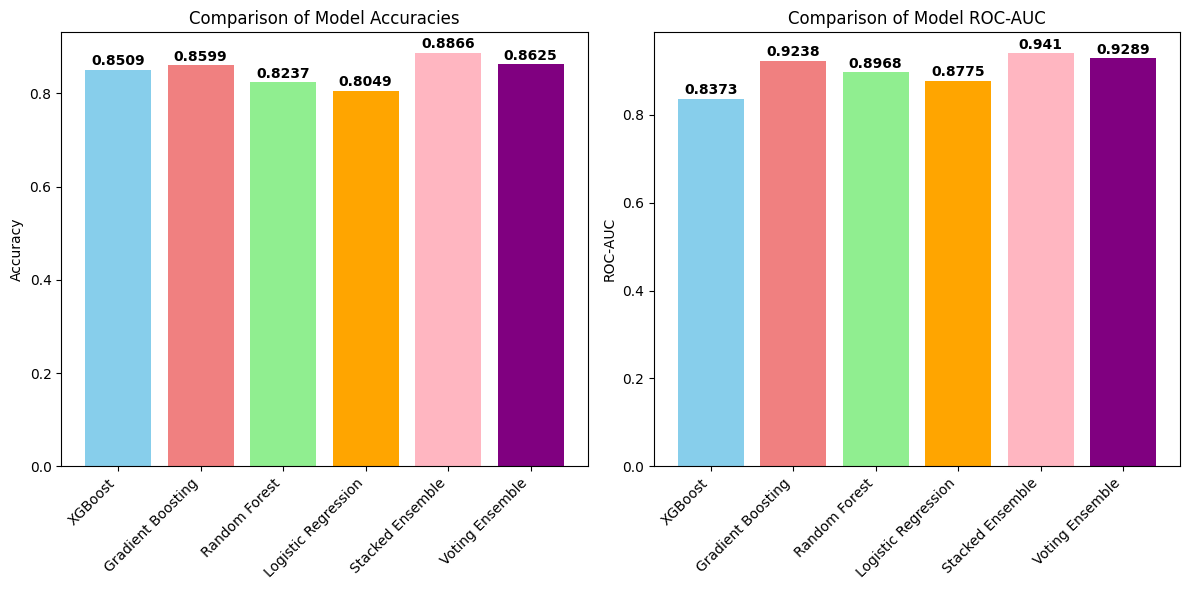

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
model_names = ['XGBoost', 'Gradient Boosting', 'Random Forest', 'Logistic Regression', 'Stacked Ensemble', 'Voting Ensemble']
accuracies = [0.8509, 0.8599, 0.8237, 0.8049, 0.8866, 0.8625]
roc_aucs = [0.8373, 0.9238, 0.8968, 0.8775, 0.9410, 0.9289]

# Create bar plot for Accuracy
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.subplot(1, 2, 1)  # Create a subplot for Accuracy
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', fontweight='bold')  # Adjust text position as needed

# Create bar plot for ROC-AUC
plt.subplot(1, 2, 2)  # Create a subplot for ROC-AUC
plt.bar(model_names, roc_aucs, color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink', 'purple'])
plt.title('Comparison of Model ROC-AUC')
plt.ylabel('ROC-AUC')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add ROC-AUC values on top of bars
for i, v in enumerate(roc_aucs):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', fontweight='bold')  # Adjust text position as needed

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# Model names and metrics
model_names = ['XGBoost', 'Gradient Boosting', 'Random Forest', 'Logistic Regression', 'Stacked Ensemble', 'Voting Ensemble']
accuracies = [0.8509, 0.8599, 0.8237, 0.8049, 0.8866, 0.8625]
roc_aucs = [0.8373, 0.9238, 0.8968, 0.8775, 0.9410, 0.9289]

# Create a pandas DataFrame
data = {'Model': model_names, 'Accuracy': accuracies, 'ROC-AUC': roc_aucs}
df = pd.DataFrame(data)

# Display the table
df

,Model,Accuracy,ROC-AUC
0,XGBoost,0.8509,0.8373
1,Gradient Boosting,0.8599,0.9238
2,Random Forest,0.8237,0.8968
3,Logistic Regression,0.8049,0.8775
4,Stacked Ensemble,0.8866,0.9410
5,Voting Ensemble,0.8625,0.9289


from matplotlib import pyplot as plt
df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['ROC-AUC'].plot(kind='hist', bins=20, title='ROC-AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Accuracy', y='ROC-AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['ROC-AUC'].plot(kind='line', figsize=(8, 4), title='ROC-AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ROC-AUC', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ROC-AUC'].plot(kind='hist', bins=20, title='ROC-AUC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Accuracy', y='ROC-AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ROC-AUC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ROC-AUC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ROC-AUC'].plot(kind='line', figsize=(8, 4), title='ROC-AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='ROC-AUC', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
!pip install tabulate -q

In [10]:
from tabulate import tabulate

# Model names and metrics
model_names = ['XGBoost', 'Gradient Boosting', 'Random Forest', 'Logistic Regression', 'Stacked Ensemble', 'Voting Ensemble']
accuracies = [0.8509, 0.8599, 0.8237, 0.8049, 0.8866, 0.8625]
roc_aucs = [0.8373, 0.9238, 0.8968, 0.8775, 0.9410, 0.9289]

# Create table data
table_data = [[model_names[i], accuracies[i], roc_aucs[i]] for i in range(len(model_names))]
headers = ["Model", "Accuracy", "ROC-AUC"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------------------+------------+-----------+
| Model               |   Accuracy |   ROC-AUC |
+=====================+============+===========+
| XGBoost             |     0.8509 |    0.8373 |
+---------------------+------------+-----------+
| Gradient Boosting   |     0.8599 |    0.9238 |
+---------------------+------------+-----------+
| Random Forest       |     0.8237 |    0.8968 |
+---------------------+------------+-----------+
| Logistic Regression |     0.8049 |    0.8775 |
+---------------------+------------+-----------+
| Stacked Ensemble    |     0.8866 |    0.941  |
+---------------------+------------+-----------+
| Voting Ensemble     |     0.8625 |    0.9289 |
+---------------------+------------+-----------+


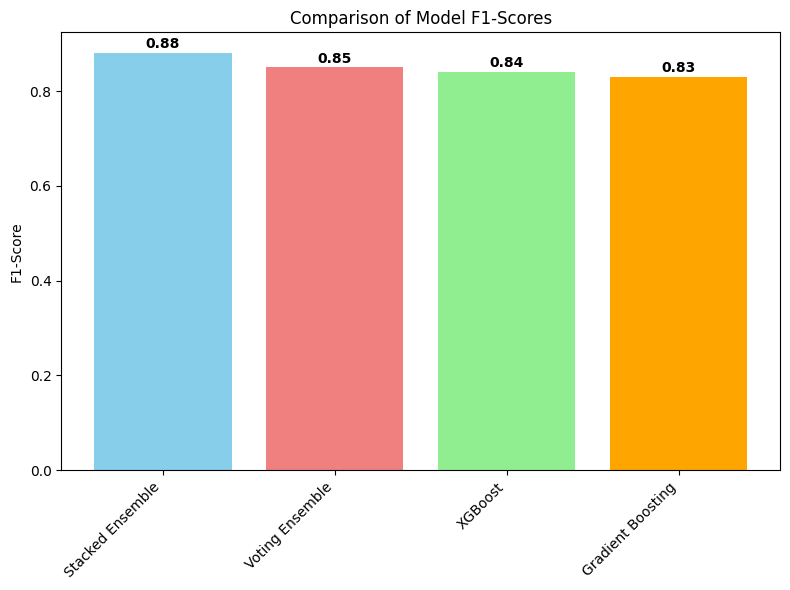

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and F1-scores
model_names = ['Stacked Ensemble', 'Voting Ensemble', 'XGBoost', 'Gradient Boosting']
f1_scores = [0.88, 0.85, 0.84, 0.83]

# Create bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(model_names, f1_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Comparison of Model F1-Scores')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add F1-score values on top of bars
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold')  # Adjust text position as needed

plt.tight_layout()
plt.show()